In [228]:
import pandas as pd
import numpy as np
from sklearn import metrics

In [229]:
df=pd.read_csv("combinedbook.csv")
df.head()

,AlphaL,AlphaH,AlphaAvg,AlphaN,BetaL,BetaH,BetaAvg,BetaN
0,2.638849,4.743201,3.691025,0.448504,2.872663,2.796035,2.834349,0.458587
1,3.632192,2.507456,3.069824,0.344971,1.829277,2.868818,2.349047,0.337262
2,1.096045,1.317057,1.206551,0.034425,1.550285,2.369430,1.959858,0.239964
3,1.569525,1.785765,1.677645,0.112941,1.042417,1.609709,1.326063,0.081516
4,2.430079,2.486414,2.458247,0.243041,5.649352,3.074447,4.361899,0.840475


In [230]:
df.drop(['AlphaL', 'AlphaH','BetaL', 'BetaH','BetaN','AlphaN'], axis=1,inplace = True)
#df.drop(['AlphaL', 'AlphaH','BetaL', 'BetaH','BetaAvg','AlphaAvg'], axis=1,inplace = True)

In [231]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(df))


MinMaxScaler(copy=True, feature_range=(0, 1))


In [232]:
print(scaler.transform(df))

[[0.5198555  0.56461834]
 [0.40886133 0.42629795]
 [0.07593779 0.31537122]
 [0.16011133 0.13472743]
 [0.29958666 1.        ]
 [0.21822379 0.35660812]
 [0.19712332 0.35820722]
 [0.16951419 0.30059067]
 [0.32753545 0.31624081]
 [0.10392983 0.35189988]
 [0.33966689 0.36226191]
 [0.28553293 0.59438891]
 [0.09748719 0.19120589]
 [0.41749964 0.17663313]
 [0.20538123 0.21388475]
 [0.19505666 0.25681909]
 [0.21590216 0.25613547]
 [0.10098228 0.35766925]
 [0.10101596 0.20860662]
 [0.11590876 0.25037309]
 [0.0872927  0.35033926]
 [0.1567053  0.1757738 ]
 [0.11454599 0.36231564]
 [0.09353611 0.168602  ]
 [0.07209597 0.18317333]
 [0.08601355 0.14338989]
 [1.         0.12556833]
 [0.21291593 0.21538567]
 [0.09214654 0.11314547]
 [0.11074313 0.19328141]
 [0.08881074 0.21684397]
 [0.21830339 0.20090012]
 [0.16775932 0.18674819]
 [0.11198011 0.21480166]
 [0.1145887  0.12991516]
 [0.05577001 0.23296068]
 [0.1602188  0.59170431]
 [0.1761758  0.2615078 ]
 [0.08516278 0.40830396]
 [0.09002726 0.27904904]


In [237]:
df1=scaler.transform(df)
type(df1)
df2=pd.DataFrame(df1)
type(df2)
df2.head()
# # df2.columns=['AlphaL', 'AlphaH', 'AlphaAvg', 'AlphaN', 'BetaL', 'BetaH', 'BetaAvg',
# #        'BetaN']
df2.columns=['AlphaN','BetaN']
df2.columns
# print(df1)

Index(['AlphaN', 'BetaN'], dtype='object')

In [239]:
df2.head()

,AlphaN,BetaN
0,0.519855,0.564618
1,0.408861,0.426298
2,0.075938,0.315371
3,0.160111,0.134727
4,0.299587,1.000000


In [240]:
label_class=np.arange((72))
print(len(label_class))
for i in range((36)) :
    label_class[i]=1
for i in range(36,72,1) :
    label_class[i]=0


print((label_class))
print(type(label_class))

72
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
<class 'numpy.ndarray'>


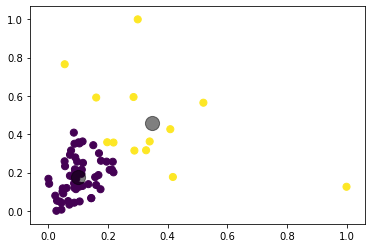

In [241]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

kmeans.fit(df2)


y_kmeans = kmeans.predict(df2)


plt.scatter(df2.loc[0:71,'AlphaN'], df2.loc[0:71,'BetaN'], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [242]:
label_predicted=kmeans.labels_
print(label_predicted)
print(type(label_predicted))

[1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
<class 'numpy.ndarray'>


In [243]:
metrics.accuracy_score(label_class, label_predicted)

0.5972222222222222

In [244]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=2, min_samples=7).fit(df2)


print(clustering)

DBSCAN(algorithm='auto', eps=2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=7, n_jobs=None, p=None)


In [245]:
metrics.accuracy_score(label_class,clustering.labels_ )

0.5

In [274]:
label_class2=np.arange((72))
#print(len(label_class2))
for i in range((36)) :
    label_class2[i]=2
for i in range(36,72,1) :
    label_class2[i]=1


#print((label_class2))
#print(type(label_class2))

In [268]:
from scipy.cluster.hierarchy import fcluster,ward
from scipy.spatial.distance import pdist

Z=ward(pdist(df2))
pred=fcluster(Z,t=1.5,criterion='distance')
print((pred))

[2 2 1 1 2 1 1 1 2 1 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [269]:
metrics.accuracy_score(label_class2,pred)

0.5694444444444444

In [270]:
from sklearn.cluster import MeanShift


clustering = MeanShift(bandwidth=3).fit(df2)

print(clustering)


MeanShift(bandwidth=3, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)


In [271]:
metrics.accuracy_score(label_class,clustering.labels_)

0.5